In [1]:
import os
from qiskit import IBMQ, transpile
from qiskit.circuit.random import random_circuit

In [2]:
hub = 'ibm-q-psnc'
group = 'internal'
project = 'reservations'
backend = 'ibmq_kolkata'

In [3]:
provider = IBMQ.enable_account(
                "df9384b1ea9f6d0f2325a0035bbcb3e73e7d31c17c348579587ef1ad08693245784707c880651b13d3c85165b415af739e80f2c342f0b07d245247caca98790b",
                hub=hub,
                group=group,
                project=project,
            )
backend = provider.get_backend(backend)

/tmp/ipykernel_165202/862735232.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.enable_account(
/tmp/ipykernel_165202/862735232.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.enable_account(


In [4]:
qx = random_circuit(5, depth=4)

In [5]:
qx.draw()

┌─────────────┐               ┌────────────────────────────────┐»
q_0: ┤ Rx(0.29496) ├───────────────┤ U(5.0862,0.64704,4.6723,4.219) ├»
     └─────────────┘               └───────────────┬────────────────┘»
q_1: ───────■──────────────■───────────────────────┼─────────────────»
          ┌─┴─┐     ┌──────┴──────┐                │                 »
q_2: ─────┤ X ├─────┤ Rx(0.88153) ├────────────────┼─────────────────»
          ├───┤     └┬────────────┤                │                 »
q_3: ─────┤ S ├──────┤ Rz(4.7694) ├────────────────┼─────────────────»
          ├───┴┐     └────────────┘                │                 »
q_4: ─────┤ √X ├───────────────────────────────────■─────────────────»
          └────┘                                                     »
«                   ┌────────────┐                             
«q_0: ─■────────────┤ Rx(3.2341) ├─────────────────────────────
«      │P(0.40992)  ├────────────┤                             
«q_1: ─■────────────┤ P(0.89144) ├─────────────────────────────
«     ┌────────────┐└────────────┘             ┌──────────────┐
«q_2: ┤ Rx(2.1441) ├───────────────────────────┤1             ├
«     └─────┬──────┘    ┌───┐     ┌───────────┐│              │
«q_3: ──────┼───────────┤ S ├─────┤ P(5.5534) ├┤  Ryy(3.0924) ├
«           │           └───┘     └───────────┘│              │
«q_4: ──────■──────────────────────────────────┤0             ├
«                                              └──────────────┘

In [6]:
transpiled = transpile(qx, backend=backend)

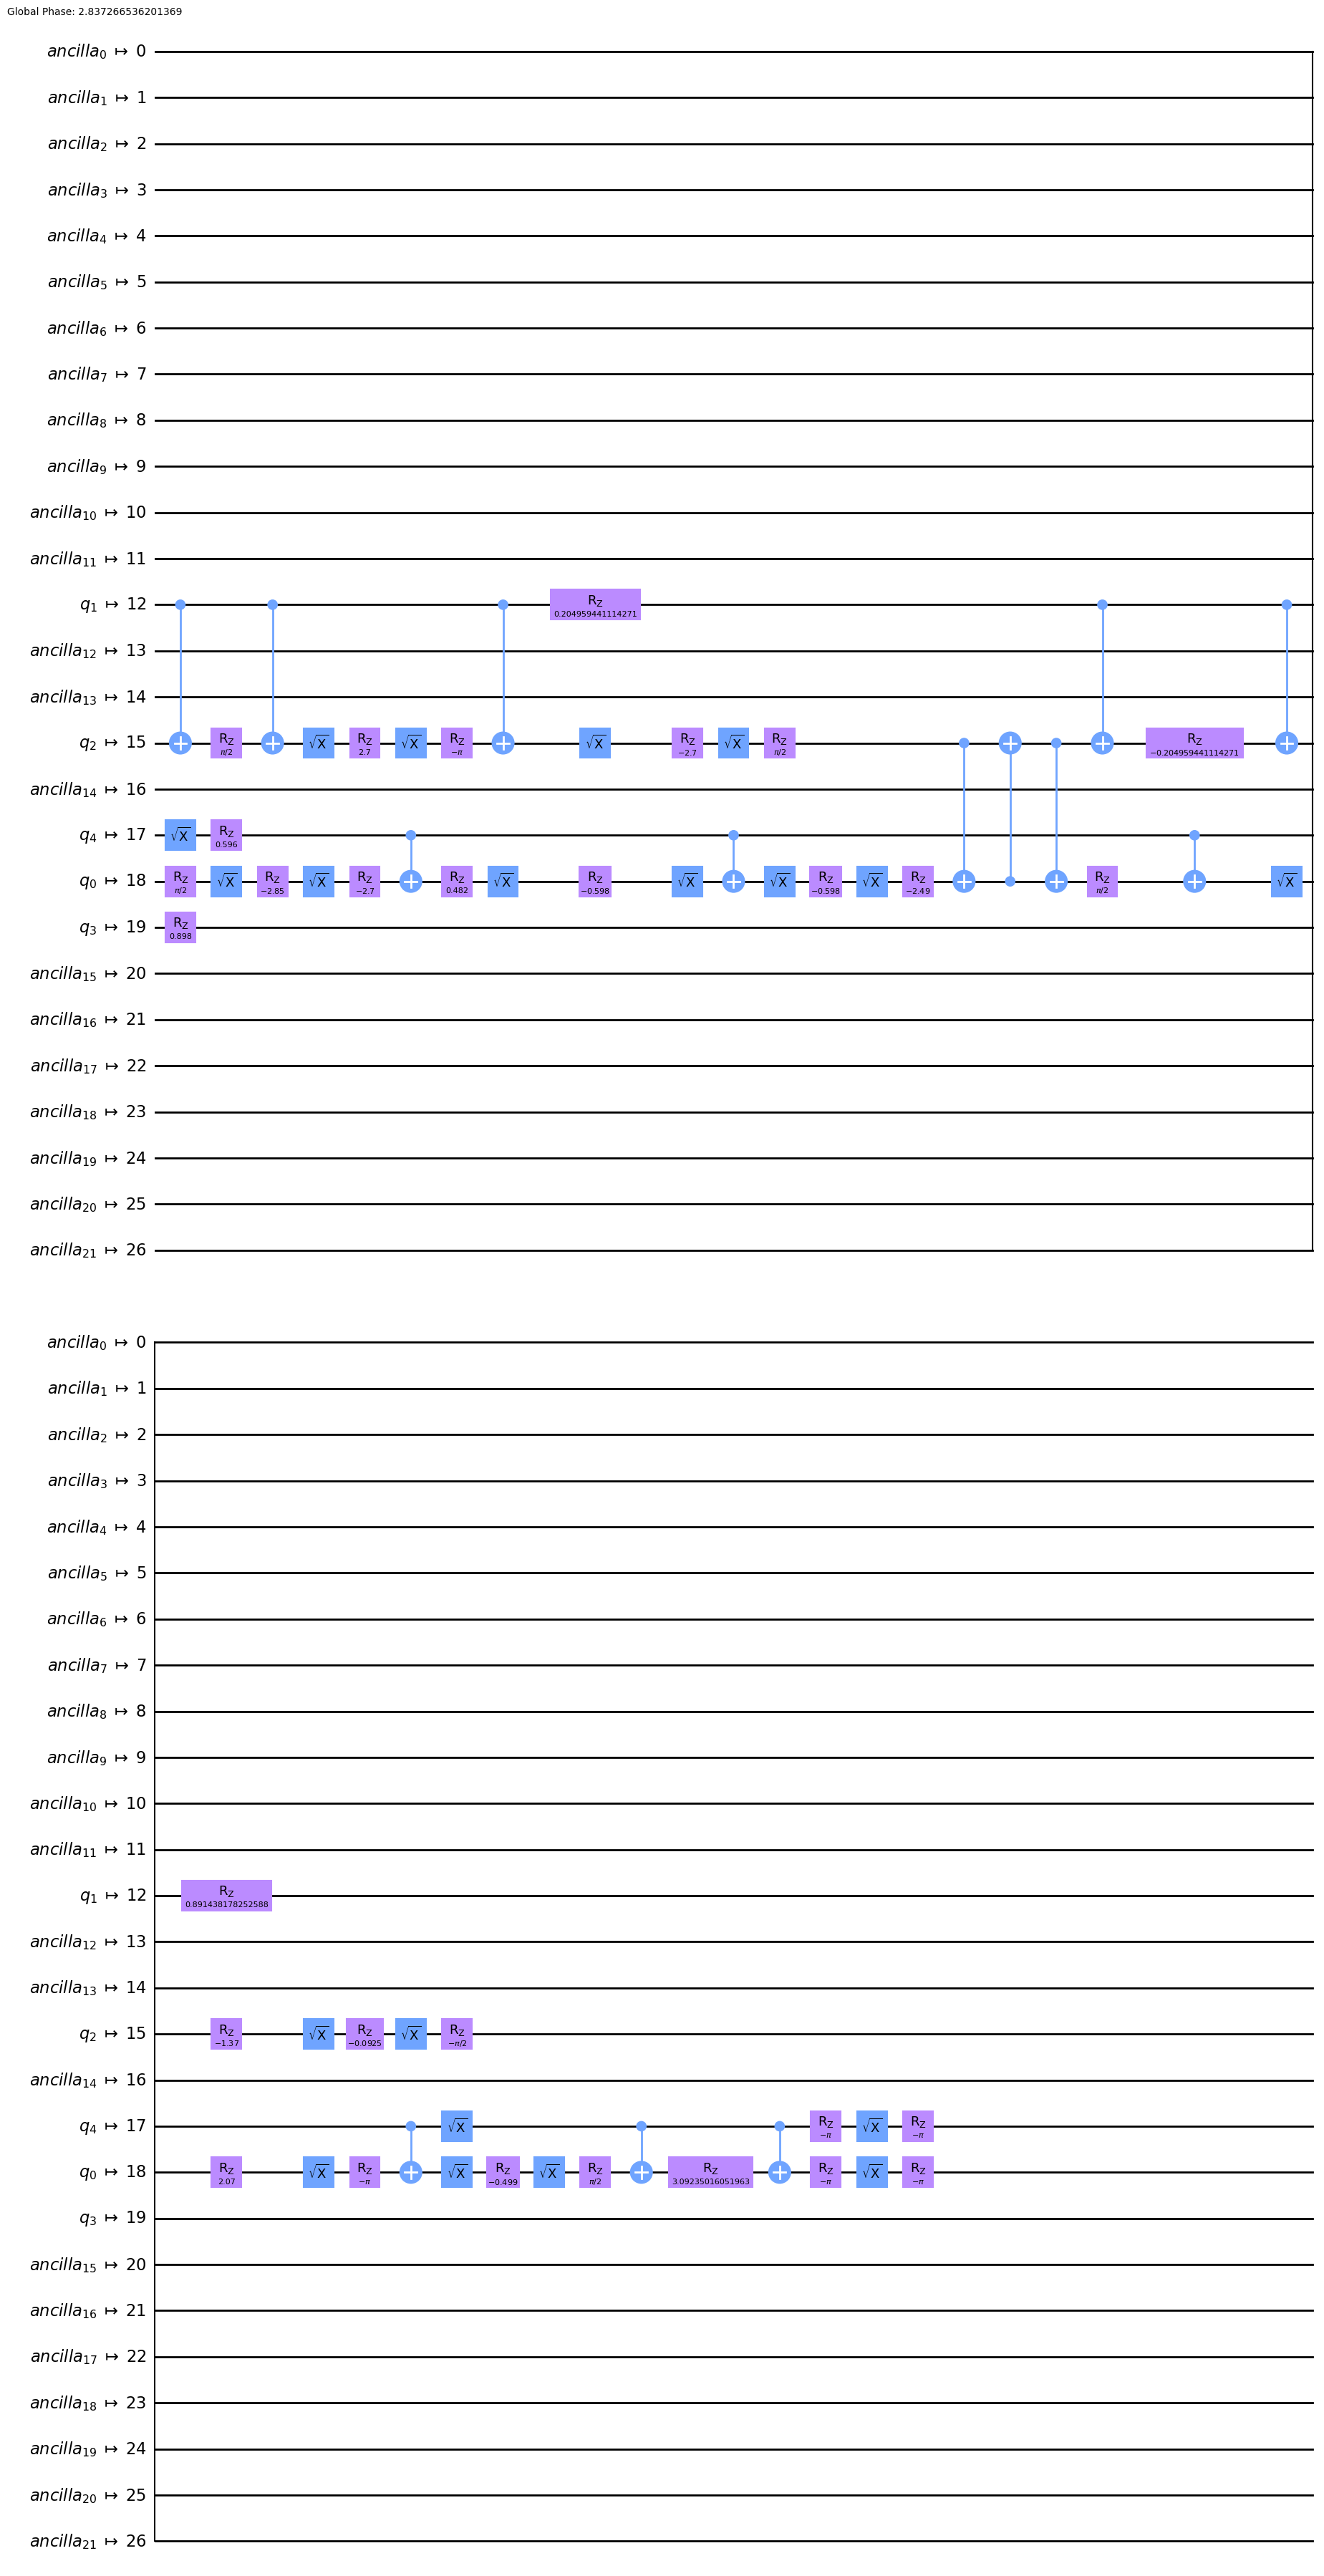

In [7]:
transpiled.draw(output="mpl")

In [9]:
job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

In [10]:
status = backend.status()

In [11]:
is_operational = status.operational

In [12]:
jobs_in_queue = status.pending_jobs

In [13]:
job_limit = backend.job_limit()

In [20]:
retrieved_job.result().get_counts()

{}

In [ ]:
retrieved_job.error_message()